In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

In [30]:
# moving block bootstrapping (MBB) p. 26 of Lahiri

def make_blocks(r, step_size, block_size):
    b = []
    for i in range(0,len(r), step_size):
        if i+block_size >= len(r):
            break
        b.append(r[i:i+block_size])
    return b

In [131]:
def plot_compare_assets_across_risk_measures(risk_fn):
    factor = 4
    xsize = len(risk_measures)*factor
    ysize = 1*factor

    fig, axs = plt.subplots(1,len(risk_measures), figsize=(xsize, ysize), sharey=True)

    for p, rm in enumerate(risk_measures):
        HE_outer = []
        for q, rn in enumerate(order):
            if rm != 'CH':
                path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)
            else:
                path = '../../results/%s/MM/rh_cross_hedge.csv'\
                %(rn)    
            _df = pd.read_csv(path)

            B_rs = make_blocks(_df.rs, 5, 100)
            B_rh = make_blocks(_df.rh, 5, 100)
            _id = np.random.choice(range(len(B_rs)), 500 , replace=True)

            HE = []
            for i in _id:
                rho_rs = risk_fn(B_rs[i])
                rho_rh = risk_fn(B_rh[i])
                HE.append(1-rho_rh/rho_rs)
            HE_outer.append(HE)

        axs[p].boxplot(HE_outer)
        axs[p].set_title(rm)

    plt.tight_layout()
    for p, a in enumerate(axs):
        xtickNames = plt.setp(axs[p], xticklabels=coin_names)
        plt.setp(xtickNames, rotation=90, fontsize=8)


In [132]:
def plot_compare_risk_measures_across_assets(risk_fn):
    factor = 4
    xsize = len(order)*factor
    ysize = 1*factor

    fig, axs = plt.subplots(1,len(order), figsize=(xsize, ysize), sharey=False)

    for p, rn in enumerate(order):
        HE_outer = []
        for q, rm in enumerate(risk_measures):
            if rm != 'CH':
                path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)
            else:
                path = '../../results/%s/MM/rh_cross_hedge.csv'\
                %(rn)    
            _df = pd.read_csv(path)

            B_rs = make_blocks(_df.rs, 5, 100)
            B_rh = make_blocks(_df.rh, 5, 100)
            _id = np.random.choice(range(len(B_rs)), 500 , replace=True)

            HE = []
            for i in _id:
                rho_rs = risk_fn(B_rs[i])
                rho_rh = risk_fn(B_rh[i])
                HE.append(1-rho_rh/rho_rs)
            HE_outer.append(HE)

        axs[p].boxplot(HE_outer)
        axs[p].set_title(rn)

    plt.tight_layout()
    for p, a in enumerate(axs):
        xtickNames = plt.setp(axs[p], xticklabels=risk_measures)
        plt.setp(xtickNames, rotation=90, fontsize=8)


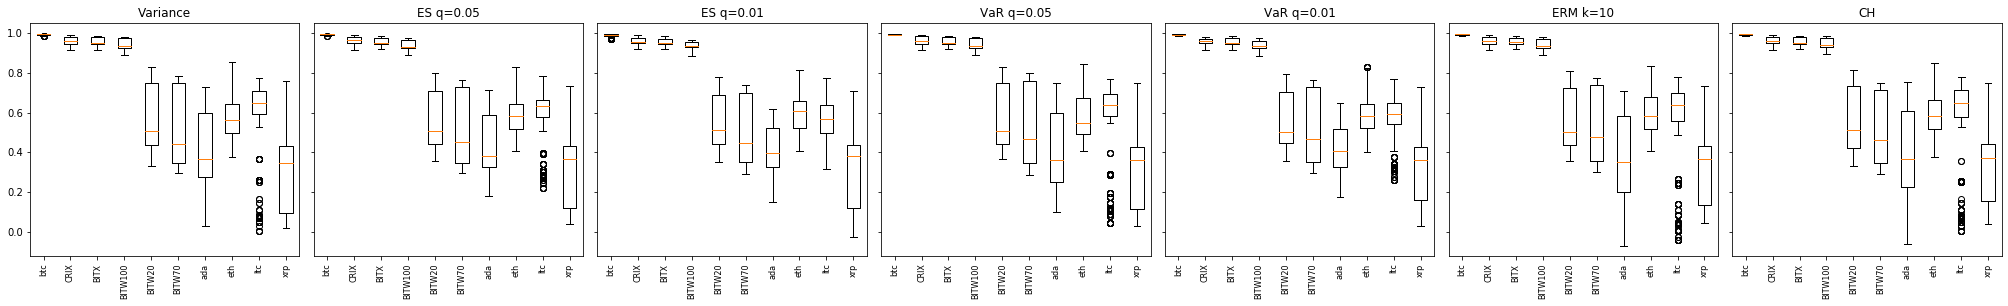

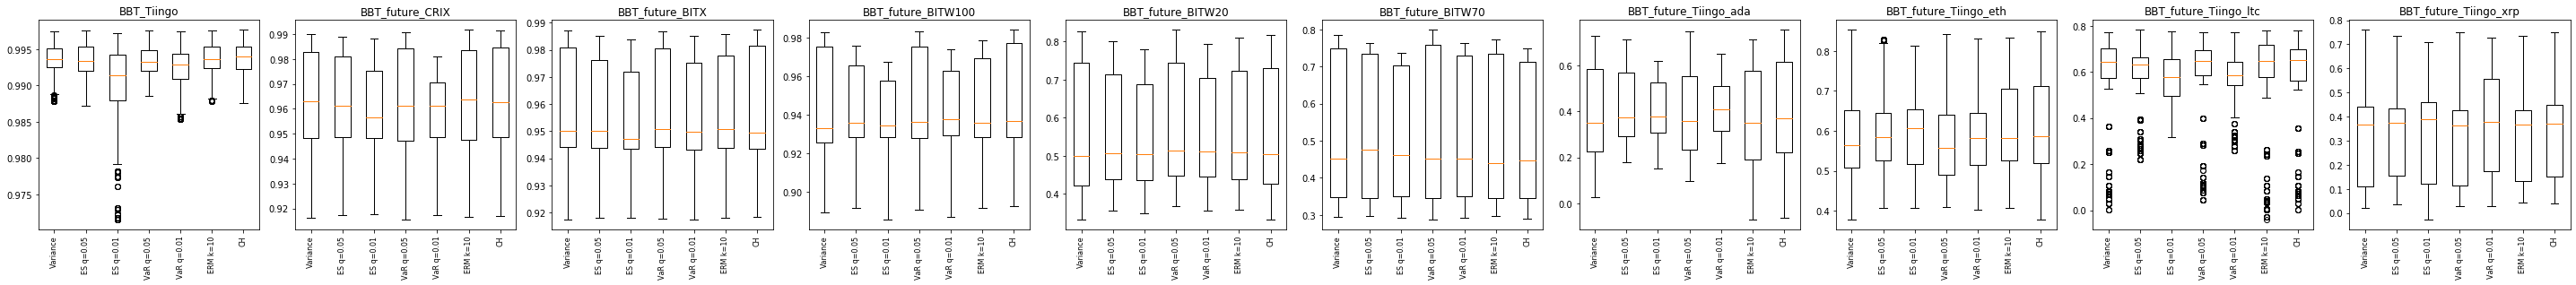

In [133]:
# Variance
risk_fn = np.var
plot_compare_assets_across_risk_measures(risk_fn)
plot_compare_risk_measures_across_assets(risk_fn)

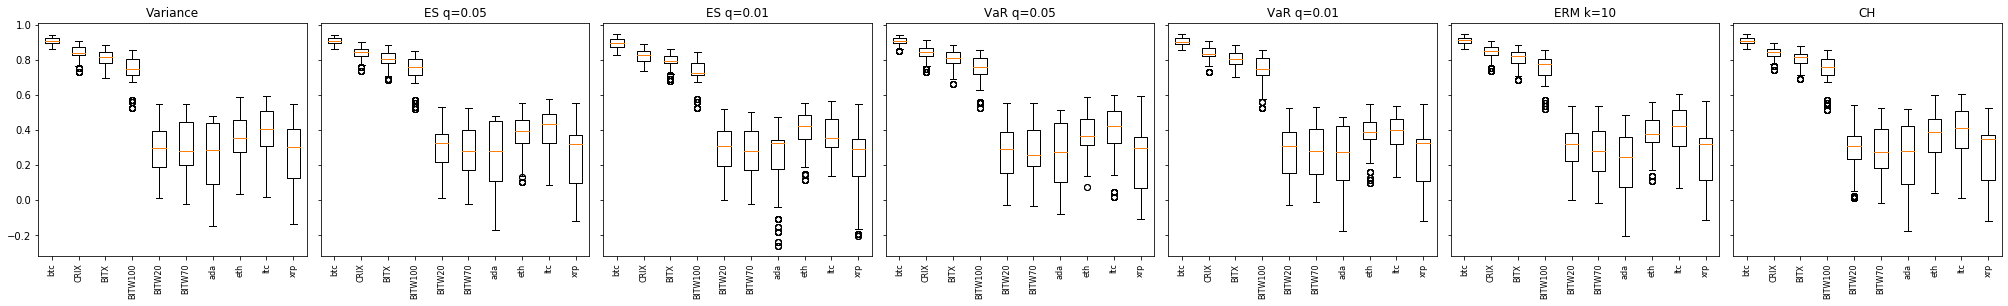

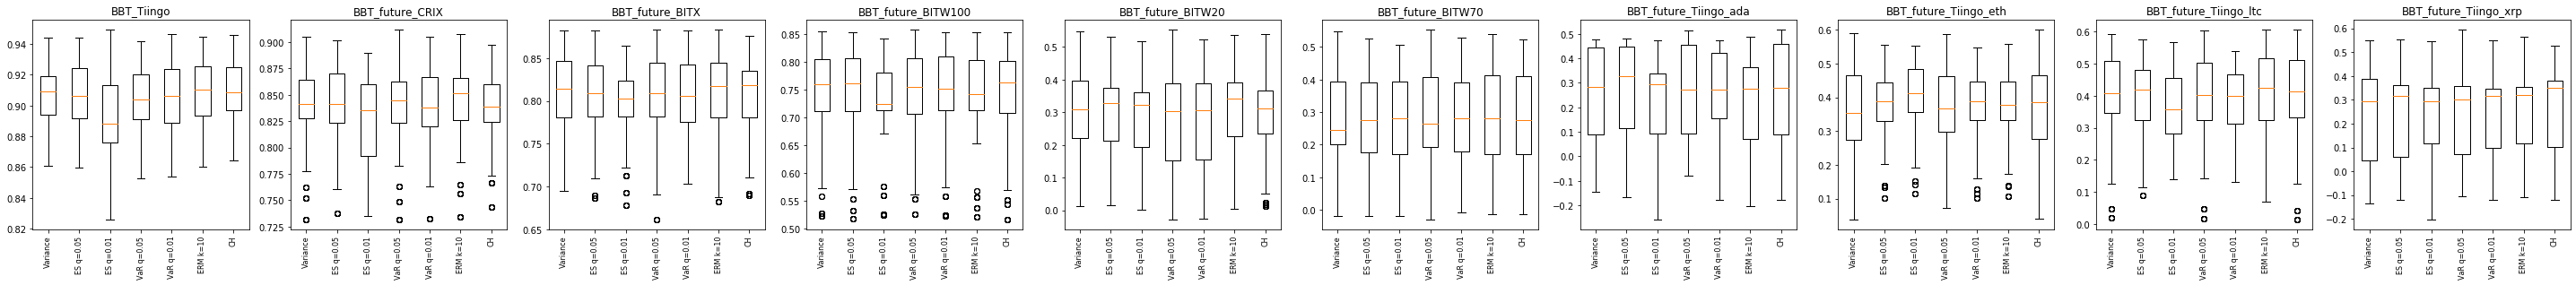

In [134]:
# Value at Risk 5%
risk_fn = lambda x: VaR(0.05, x)
plot_compare_assets_across_risk_measures(risk_fn)
plot_compare_risk_measures_across_assets(risk_fn)

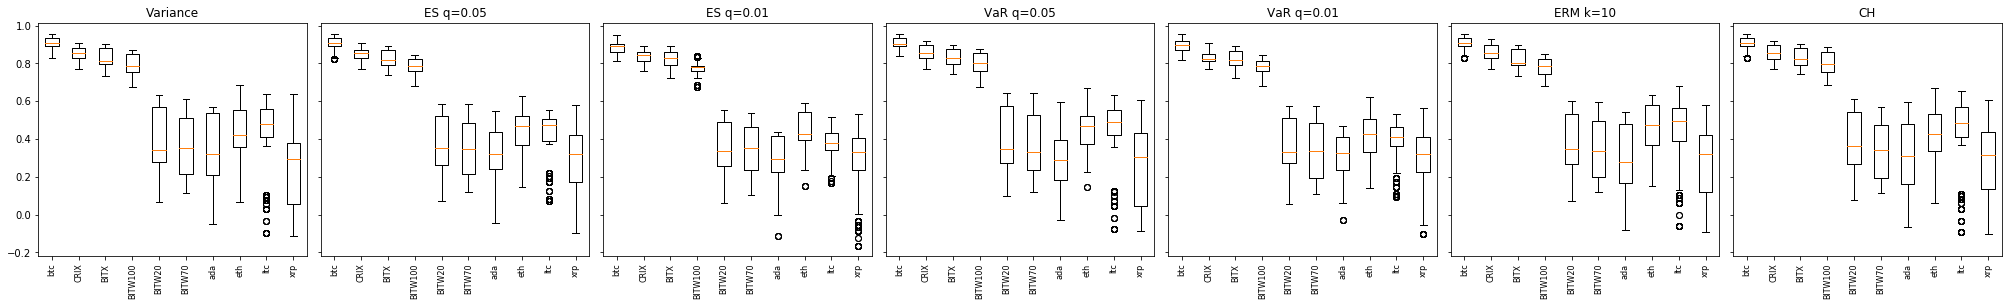

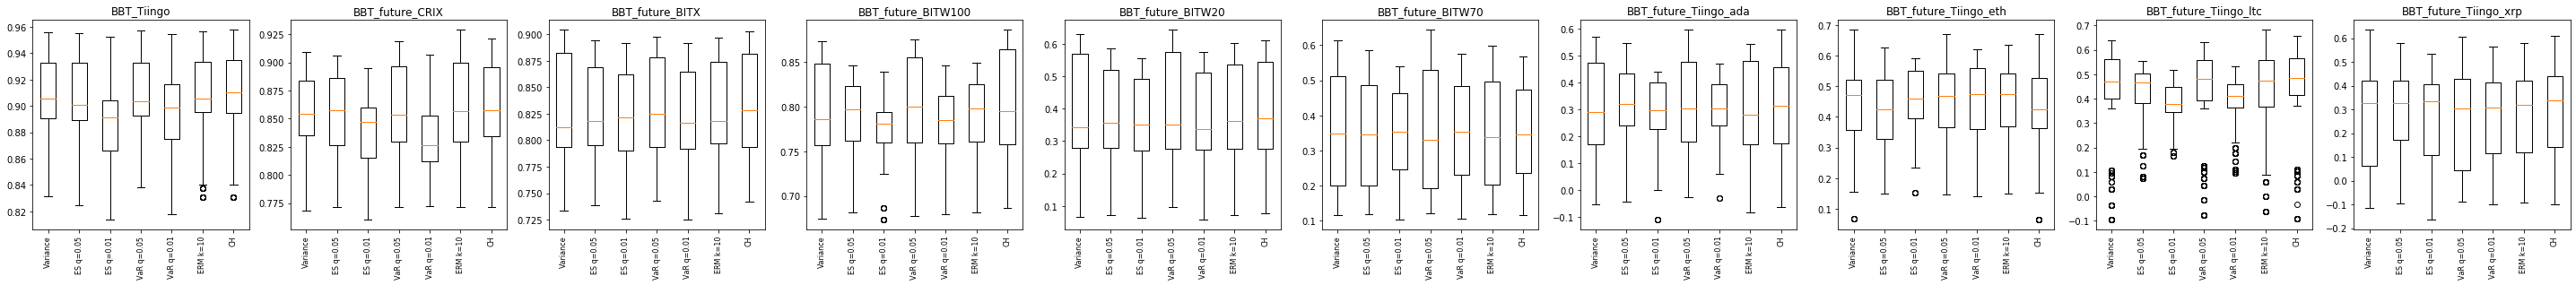

In [135]:
# Expected Shortfall 5%
risk_fn = lambda x: ES(0.05, x)
plot_compare_assets_across_risk_measures(risk_fn)
plot_compare_risk_measures_across_assets(risk_fn)

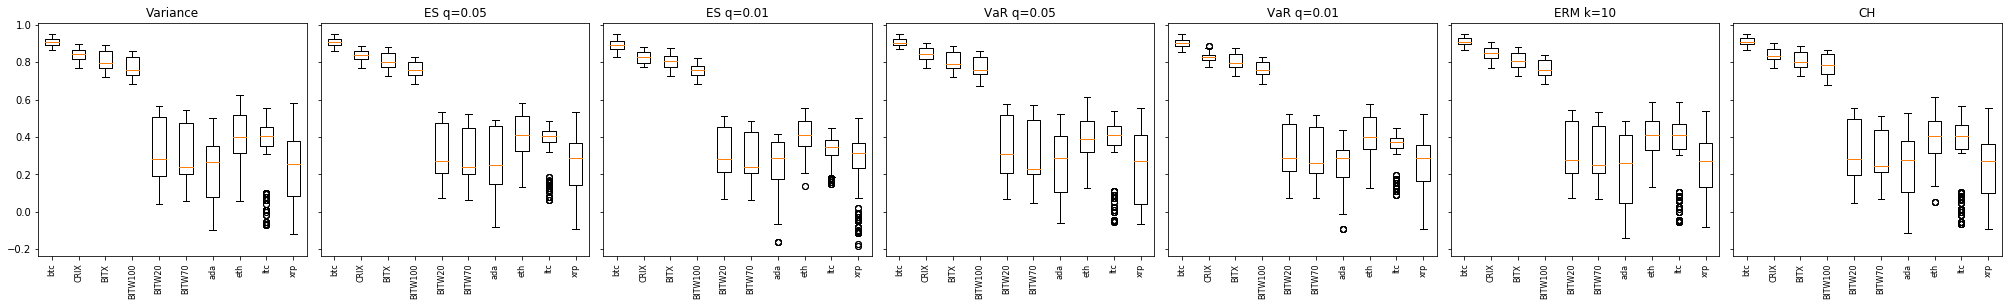

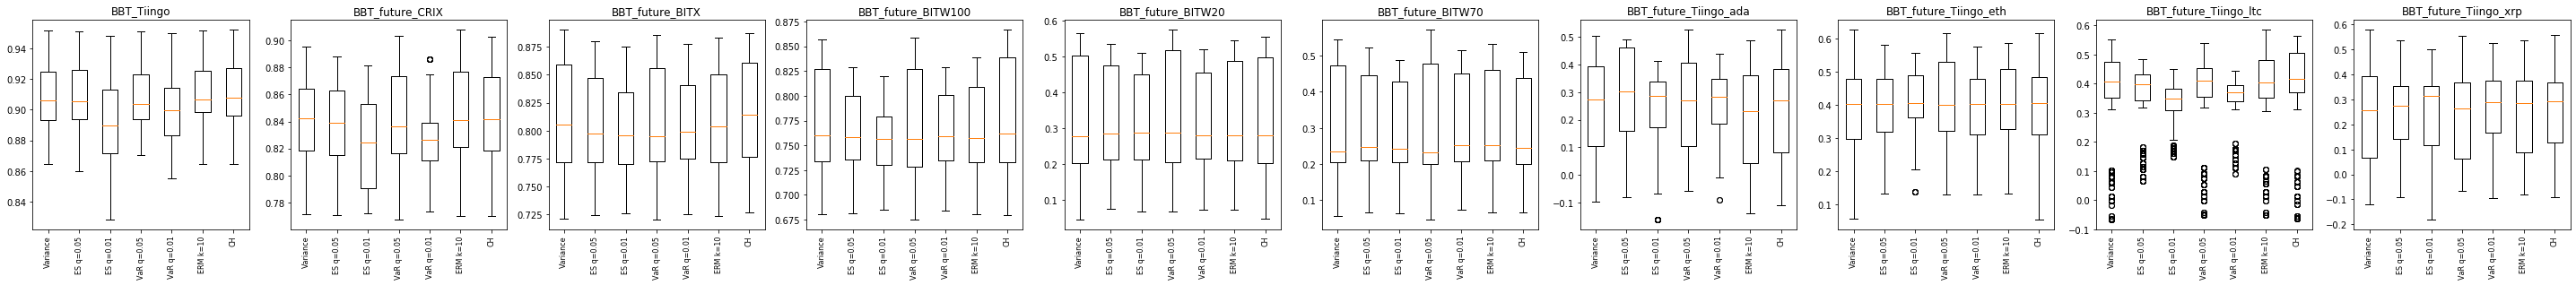

In [136]:
# ERM k=10
risk_fn = lambda x: ERM_estimate_trapezoidal(10, x)
plot_compare_assets_across_risk_measures(risk_fn)
plot_compare_risk_measures_across_assets(risk_fn)

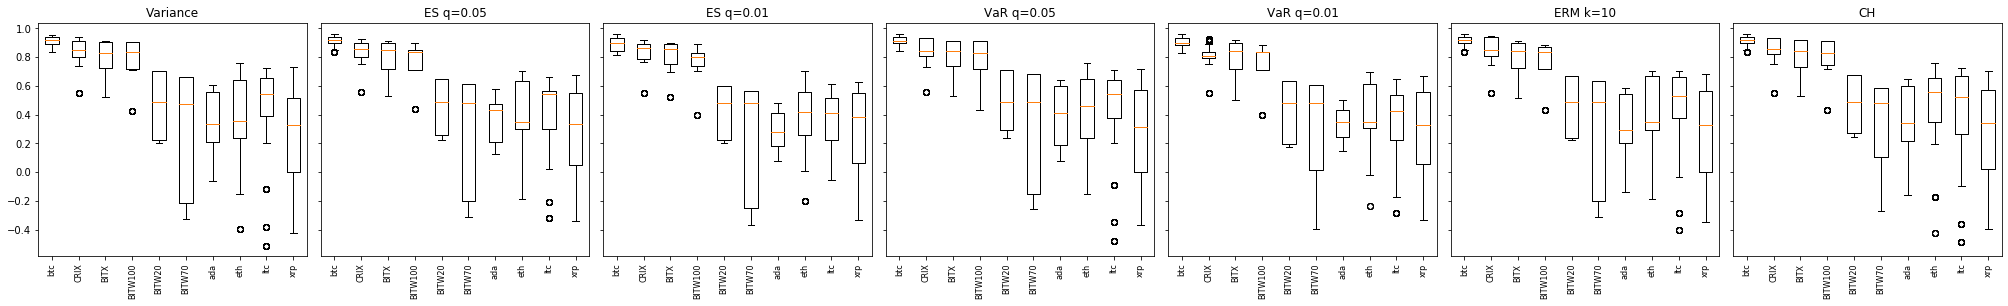

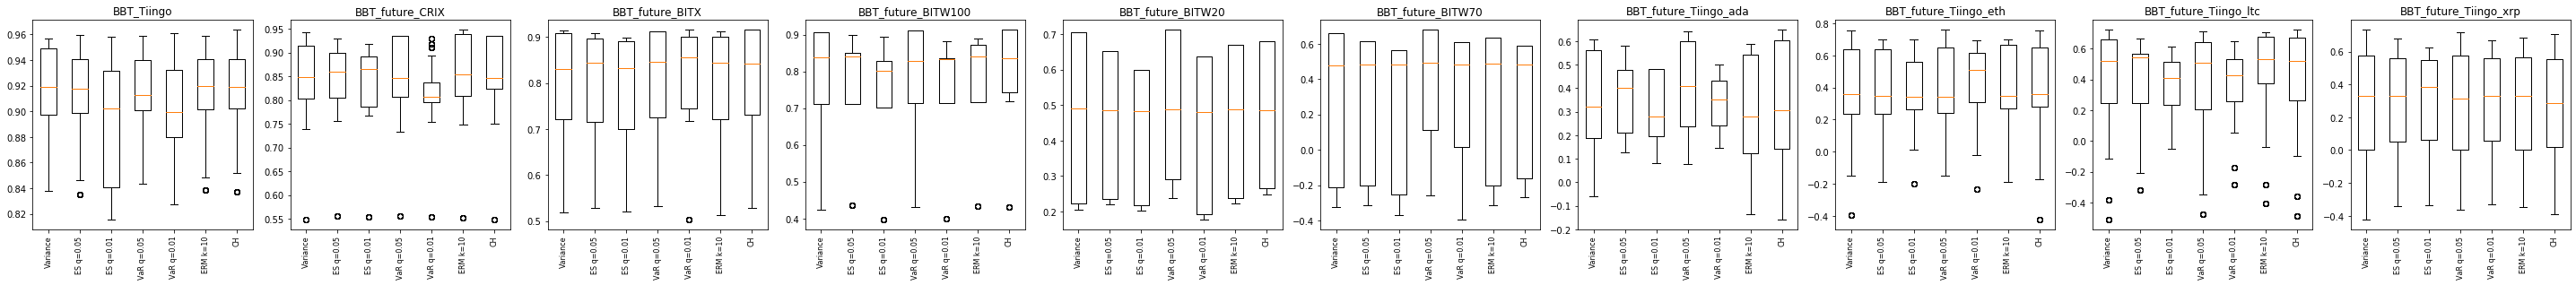

In [137]:
# Maximum Drawdown
risk_fn = np.min
plot_compare_assets_across_risk_measures(risk_fn)
plot_compare_risk_measures_across_assets(risk_fn)